# Naive Bayes Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

In [2]:
data = pd.read_csv("Data\\Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 36.9 KB


## Splitting for X and Y

In [5]:
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

## Preprocessing

### Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
x_scaled = scaler.fit_transform(x)

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

## Creating the Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

In [10]:
classifier.fit(x_train, y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[55,  4],
       [ 3, 18]], dtype=int64)

In [14]:
print(f"Accuracy for training data {classifier.score(x_train, y_train)}")
print(f"Accuracy for test data {classifier.score(x_test, y_test)}")

Accuracy for training data 0.884375
Accuracy for test data 0.9125


## Visualizing the results

/tmp/ipykernel_32/2954061866.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


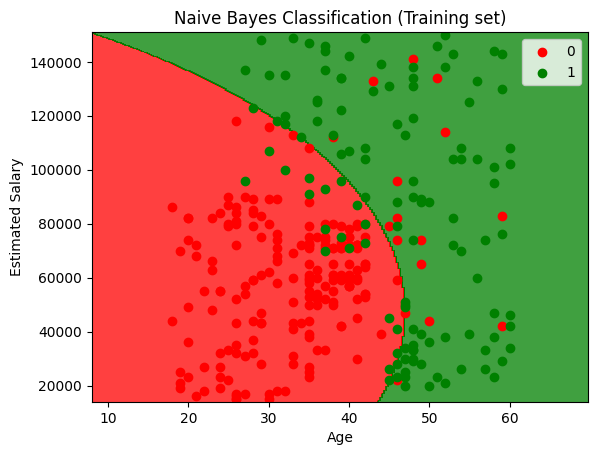

In [49]:
from matplotlib.colors import ListedColormap

X_set, y_set = scaler.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Naive Bayes Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()